# Etude dynamique du coude

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Définition des données du problème

In [2]:
l=0.4 #longueur avant-bras/main (m)
gamma=0.43 #coefficient anthropométrique centre de masse de l'avant bras
delta=0.016 #pourcentage de la masse de l'avant bras sur la masse totale du sujet
l2=0.06 #distance de l'insertion musculaire du biceps brachial sur le radius par rapport au centre articulaire du coude (m)
R=0.05 #rayon de l'avant-bras
mt=80 #masse totale du sujet (kg)
mh=10 #masse de l'haltère (kg)
ms=delta*mt #masse de l'avant bras (kg)
Is=ms*(R*R+l*l/3)/4 #inertie approximative de l'avant-bras (kg)
beta=np.pi/3 #angle d'incidence du biceps avec l'avant-bras (rad) 
couleurs=['r','b','g','c','k']
g=9.81 #constante de pesanteur

#définition des entrées pour la génération de trajectoire
disc=500 #nombre de points pour la génération des trajectoires
qf=np.pi/2 #distance parcourue par l'articulation (rad)
tf=10 #temps de parcours (s)

## Trajectoire angulaire hyperbolique 

In [3]:
def Traj(qf,tf,disc):
    Q=np.zeros((4,disc))

    t=np.linspace(0., tf, num=disc)
    Q[0,:]=t
    Q[1,:]=-2*qf*t*t*t/(tf*tf*tf)+3*qf*t*t/(tf*tf)
    Q[2,:]=-6*qf*t*t/(tf*tf*tf)+6*qf*t/(tf*tf)
    Q[3,:]=-12*qf*t/(tf*tf*tf)+6*qf/(tf*tf)
    
    return np.array(Q)

## Calcul et tracé de la trajectoire

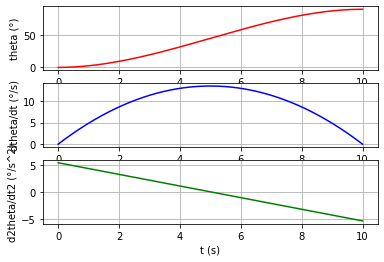

In [4]:
Q=Traj(qf,tf,disc)

plt.subplot(3,1,1)
plt.grid()
plt.plot(Q[0,:],Q[1,:]*180/np.pi,couleurs[0])
plt.xlabel('t (s)')
plt.ylabel('theta (°)')
plt.subplot(3,1,2)
plt.grid()
plt.plot(Q[0,:],Q[2,:]*180/np.pi,couleurs[1])
plt.xlabel('t (s)')
plt.ylabel('dtheta/dt (°/s)')
plt.subplot(3,1,3)
plt.grid()
plt.plot(Q[0,:],Q[3,:]*180/np.pi,couleurs[2])
plt.xlabel('t (s)')
plt.ylabel('d2theta/dt2 (°/s^2)')

plt.show()


## Fonction de calcul de la force dans le biceps brachial et des réactions articulaires

On rappelle ici les équations obtenues lors du TD

![alt text](f_equations_coude.png "Title")

In [5]:
def FR(q,dq,ddq,ms,Is,mh,gamma,l,l2,beta,g):
    R=np.zeros(3)
    F2=((Is+gamma*gamma*l*l*ms+l*l*mh)*ddq+gamma*l*ms*g*np.cos(q)+l*mh*g*np.cos(q))/(l2*np.sin(beta))
    Rx=-l*dq*dq*np.cos(q)*(gamma*ms+mh)-l*ddq*np.sin(q)*(gamma*ms+mh)+F2*(np.cos(beta)*np.cos(q)+np.sin(beta)*np.sin(q))
    Ry=-l*dq*dq*np.sin(q)*(gamma*ms+mh)+l*ddq*np.cos(q)*(gamma*ms+mh)+F2*(np.cos(beta)*np.sin(q)-np.sin(beta)*np.cos(q))
    R[0]=F2
    R[1]=Rx
    R[2]=Ry
    return np.array(R)


## Vérification des équations en statique

In [6]:
R_statique=FR(0,0,0,ms,Is,mh,gamma,l,l2,beta,g)
print('F2=',R_statique[0],'N')
print('Rx=',R_statique[1],'N')
print('Ry=',R_statique[2],'N')


F2= 796.7389374316163 N
Rx= 398.36946871580824 N
Ry= -689.99616 N


## Calcul des efforts pour la trajectoire voulue

In [7]:
R=np.zeros((3,disc))

for i in range(0,disc):
    Ri=FR(Q[1,i],Q[2,i],Q[3,i],ms,Is,mh,gamma,l,l2,beta,g)
    R[:,i]=Ri
        


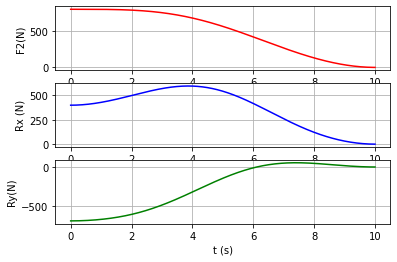

In [8]:

plt.subplot(3,1,1)
plt.grid()
plt.plot(Q[0,:],R[0,:],couleurs[0])
plt.xlabel('t (s)')
plt.ylabel('F2(N)')
plt.subplot(3,1,2)
plt.grid()
plt.plot(Q[0,:],R[1,:],couleurs[1])
plt.xlabel('t (s)')
plt.ylabel('Rx (N)')
plt.subplot(3,1,3)
plt.grid()
plt.plot(Q[0,:],R[2,:],couleurs[2])
plt.xlabel('t (s)')
plt.ylabel('Ry(N)')

plt.show()